### Model

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import distutils as _distutils
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam


print("Everything was imported")

2024-10-12 08:54:09.848794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Everything was imported


In [2]:
audio_file = './Music_Genre_Dataset/genres_original/classical/classical.00000.wav'

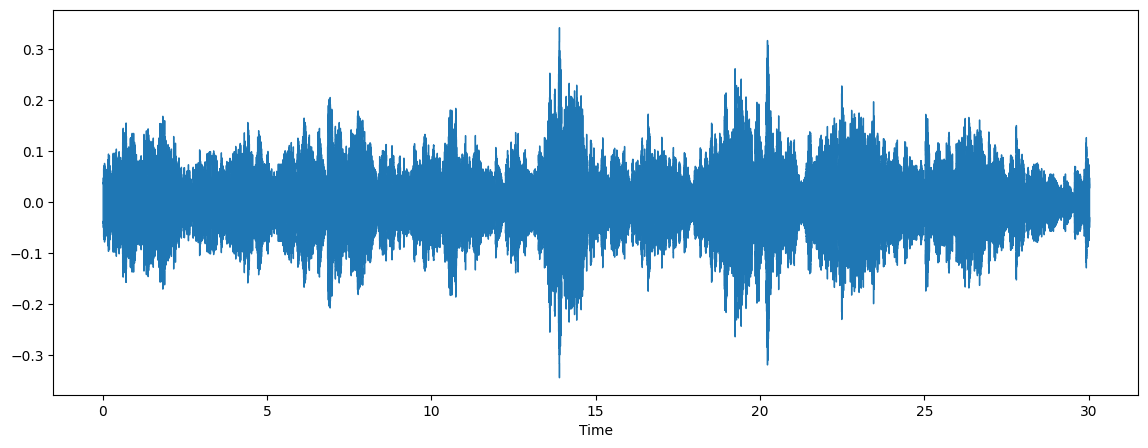

In [3]:
y, sr = librosa.load(audio_file,sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

In [4]:
from IPython.display import Audio
Audio(data=y, rate=sr)

### Doing Visualization

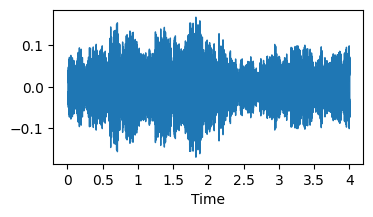

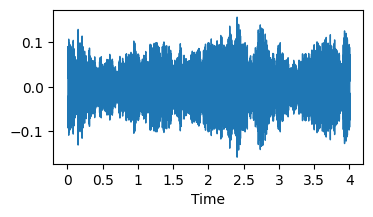

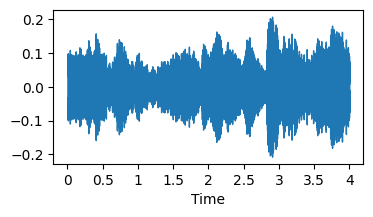

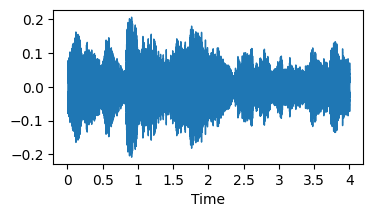

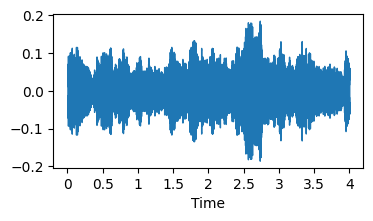

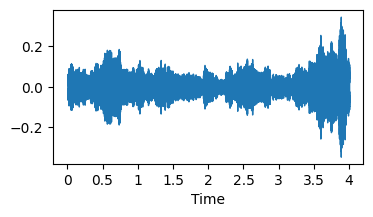

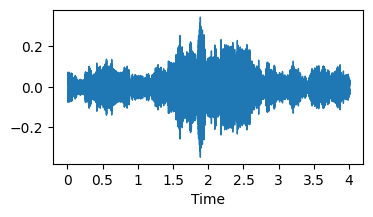

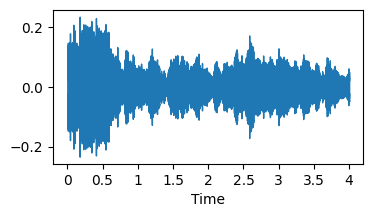

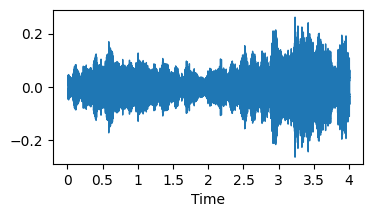

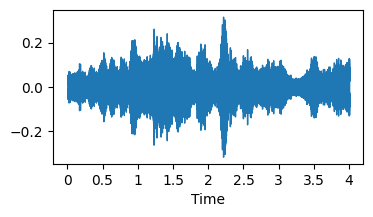

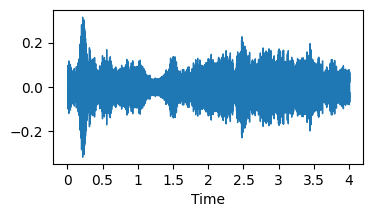

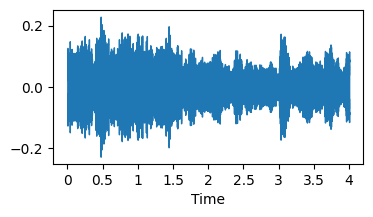

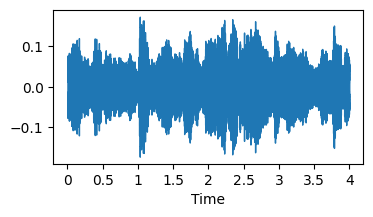

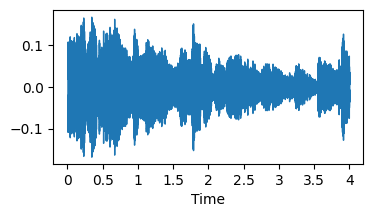

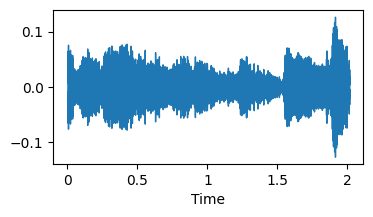

In [5]:
audio_path='./Music_Genre_Dataset/genres_original/classical/classical.00000.wav'
y, sr = librosa.load(audio_file,sr=None)

# chunking
chunk_dur=4
overlap_dur=2

# convertion
chunk_sample=chunk_dur*sr
overlap_sample=overlap_dur*sr

# cal no of chunks
num_chunks=int(np.ceil((len(y)-chunk_sample)/(chunk_sample-overlap_sample)))+1

# iterate over chunks
for i in range(num_chunks):
    start=i*(chunk_sample-overlap_sample)
    end=start+chunk_sample
    chunk=y[start:end]

    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

## Melspectrogram  Visualization

In [6]:
def plot_melspectogram(y,sr):
    spectogram= librosa.feature.melspectrogram(y=y,sr=sr)
    spectogram_db=librosa.power_to_db(spectogram,ref=np.max)

    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')
    plt.tight_layout()
    plt.show()

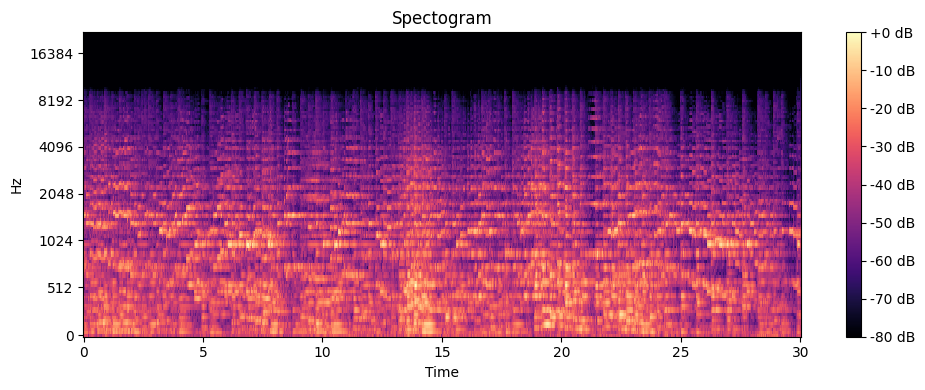

In [7]:
random_file = "./Music_Genre_Dataset/genres_original/classical/classical.00000.wav"
y,sr=librosa.load(random_file,sr=44100)

plot_melspectogram(y,sr)

In [8]:
def plot_melspectogram_chunks(y,sr):     
    # chunking
    chunk_dur=4
    overlap_dur=2

    # convertion
    chunk_sample=chunk_dur*sr
    overlap_sample=overlap_dur*sr

    # cal no of chunks
    num_chunks=int(np.ceil((len(y)-chunk_sample)/(chunk_sample-overlap_sample)))+1

    # iterate over chunks
    for i in range(num_chunks):
        start=i*(chunk_sample-overlap_sample)
        end=start+chunk_sample
        chunk=y[start:end]

        melspectogram=librosa.feature.melspectrogram(y=chunk,sr=sr)
        melspectogram_db=librosa.power_to_db(melspectogram,ref=np.max)
            
        plt.figure(figsize=(10,4))
        librosa.display.specshow(melspectogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-Spectogram')
        plt.tight_layout()
        plt.show()
    

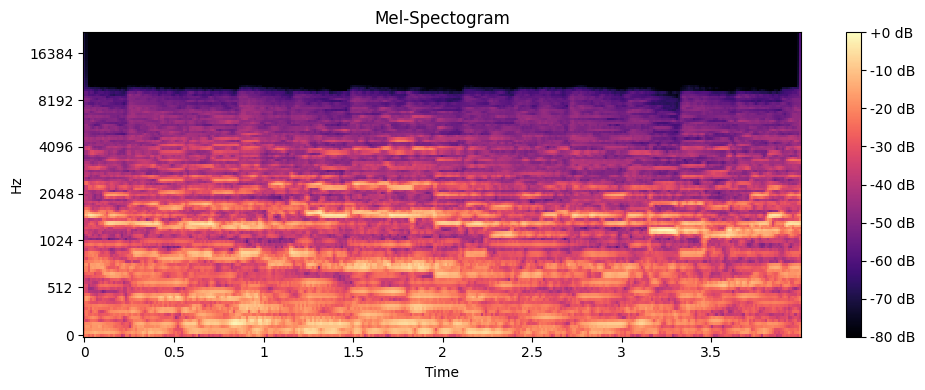

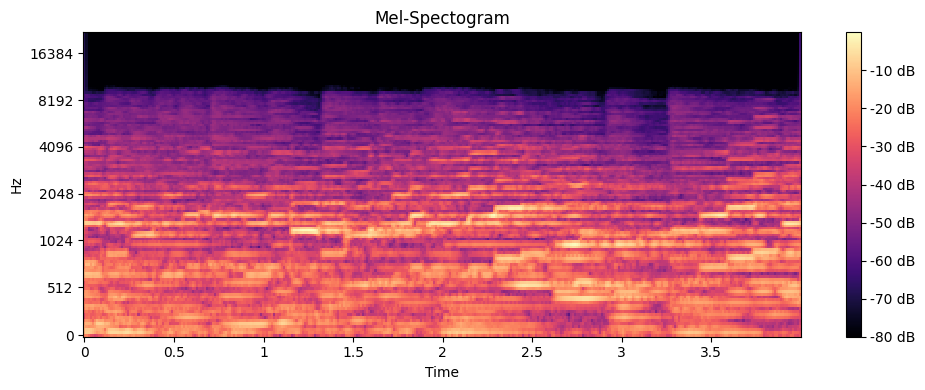

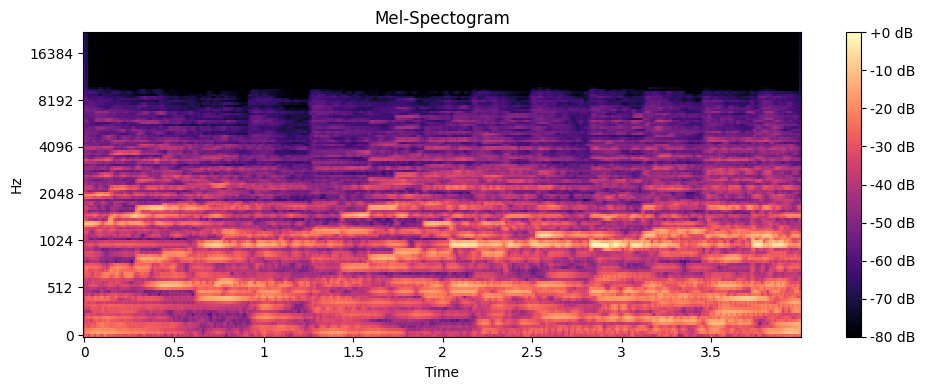

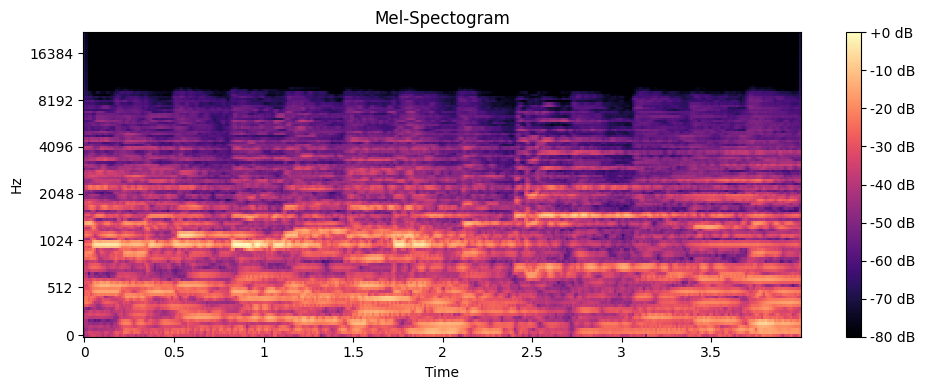

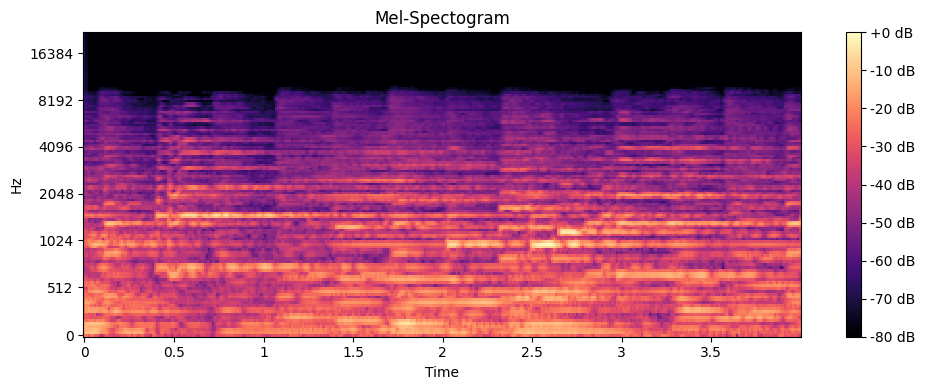

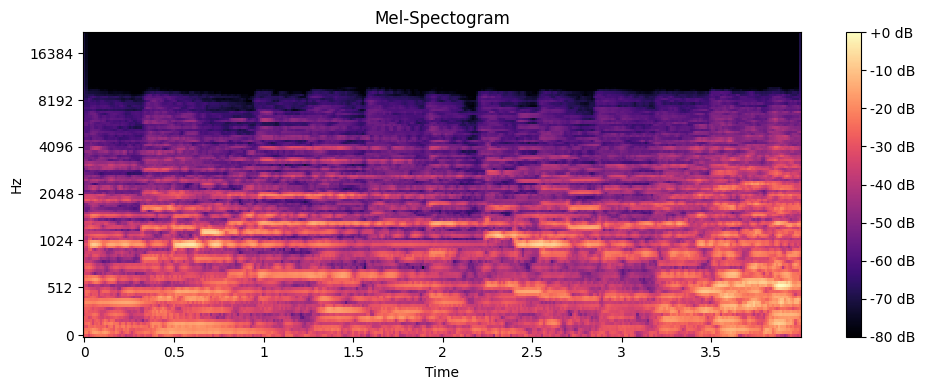

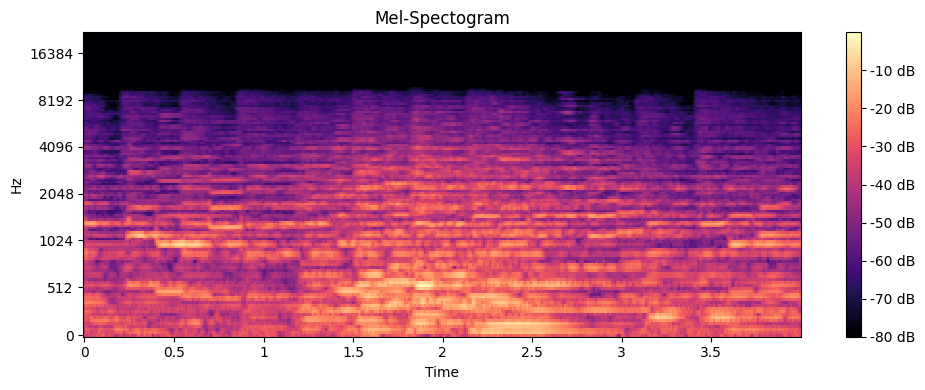

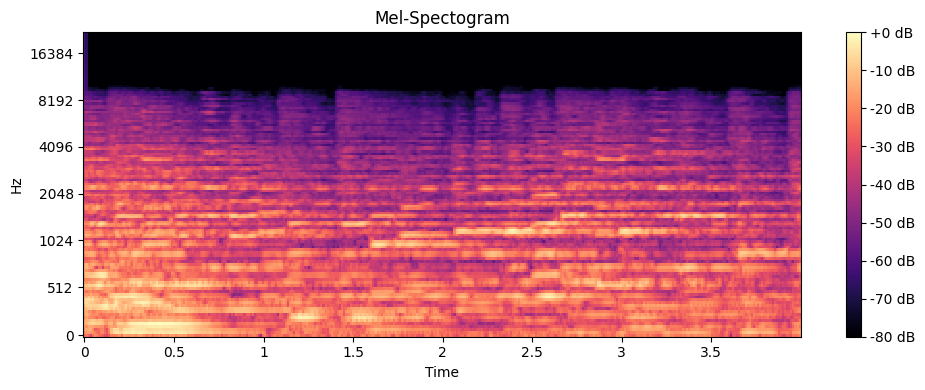

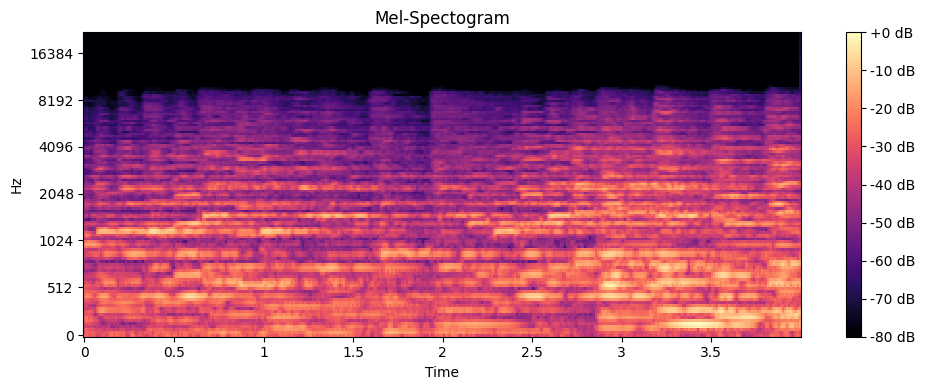

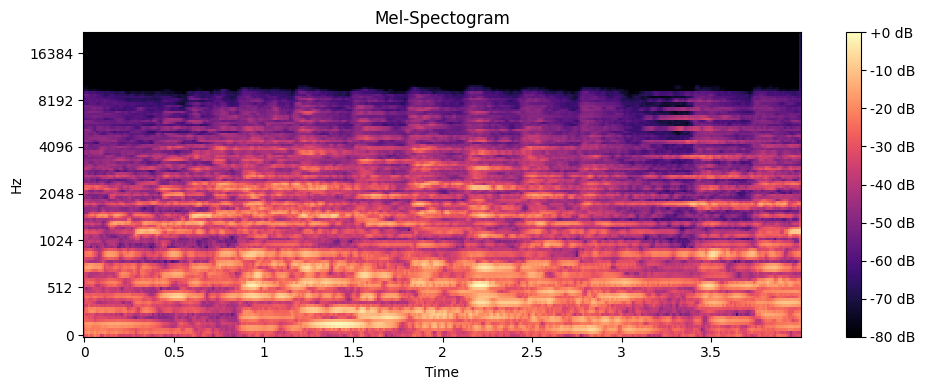

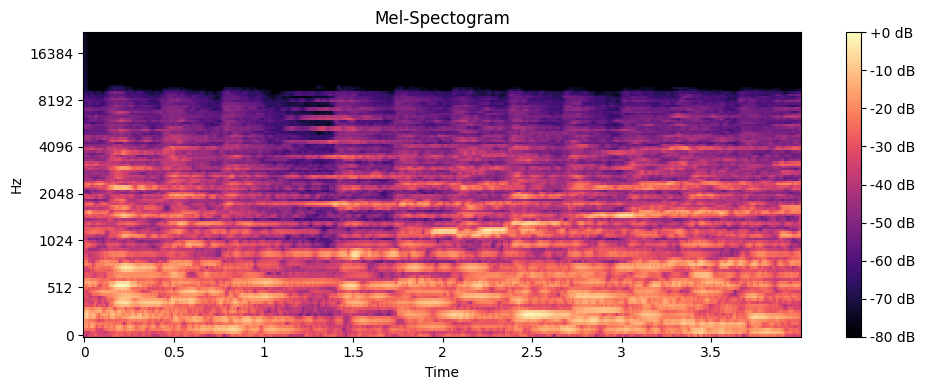

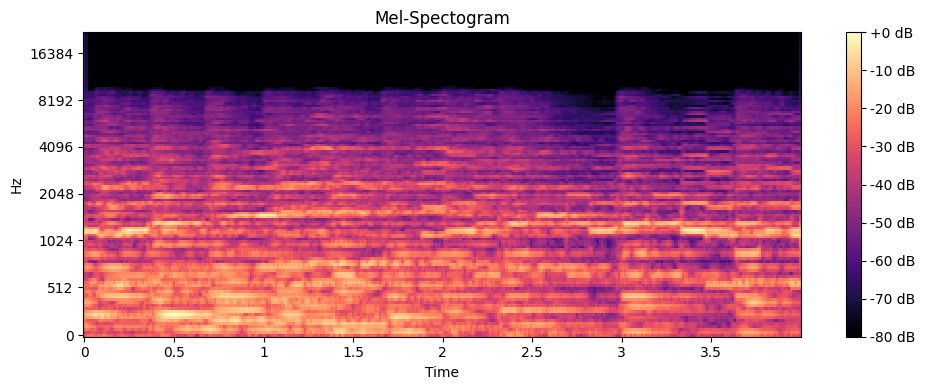

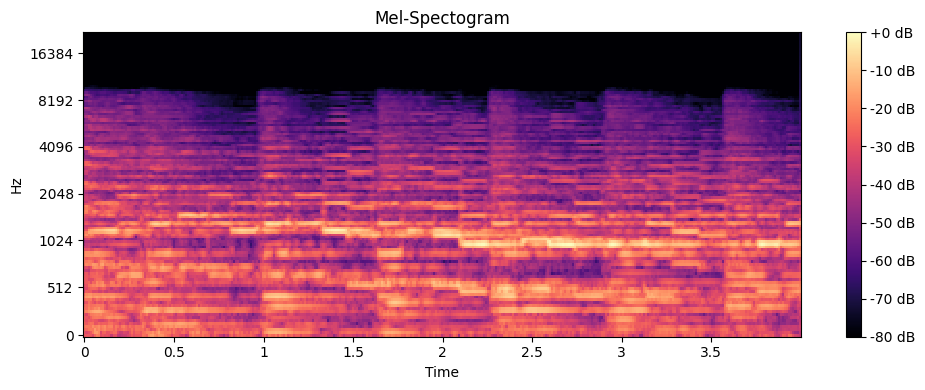

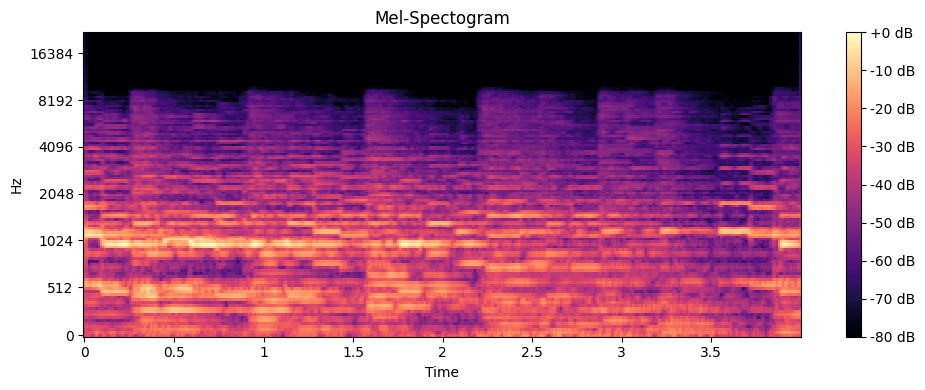

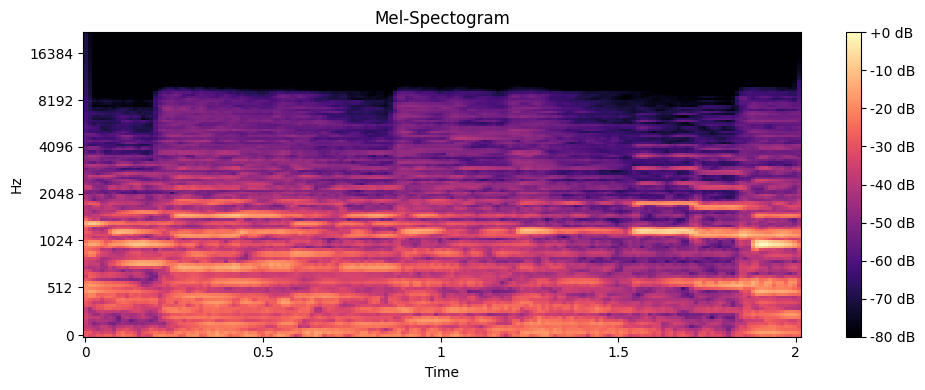

In [9]:
random_file = "./Music_Genre_Dataset/genres_original/classical/classical.00000.wav"
y,sr=librosa.load(random_file,sr=44100)

plot_melspectogram_chunks(y,sr)

-------

# Data Preprocessing

In [10]:
data_dir="./Music_Genre_Dataset/genres_original"
classes=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

In [11]:
import os
import numpy as np
import librosa
from tensorflow.image import resize

# Load and preprocess data
def load_and_preprocess_data(data_dir, classes, target_shape=(210, 210)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing ----", class_name)
        
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sr = librosa.load(file_path, sr=None)

                # Performing Preprocessing
                # Chunking parameters
                chunk_dur = 4  # in seconds
                overlap_dur = 2  # in seconds

                # Conversion to samples
                chunk_sample = chunk_dur * sr
                overlap_sample = overlap_dur * sr

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_sample) / (chunk_sample - overlap_sample))) + 1

                # Iterate over chunks
                for i in range(num_chunks):
                    start = i * (chunk_sample - overlap_sample)
                    end = start + chunk_sample
                    chunk = audio_data[start:end]

                    # Check if the chunk is valid (not empty)
                    if len(chunk) < chunk_sample:
                        continue

                    # Compute the Mel spectrogram
                    melspectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)

                    # Resizing the Mel spectrogram
                    melspectrogram = resize(np.expand_dims(melspectrogram, axis=-1), target_shape)

                    # Append to data
                    data.append(melspectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)


In [12]:
data,labels= load_and_preprocess_data(data_dir,classes)

Processing ---- blues
Processing ---- classical
Processing ---- country
Processing ---- disco
Processing ---- hiphop
Processing ---- jazz
Processing ---- metal
Processing ---- pop
Processing ---- reggae
Processing ---- rock


In [13]:
data.shape

(2236, 210, 210, 1)

In [14]:
labels.shape

(2236,)

In [15]:
from tensorflow.keras.utils import to_categorical

labels=to_categorical(labels,num_classes=len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
labels.shape

(2236, 10)

# Splitting of DS for training

In [17]:
# Splitting of Ds for training

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(data,labels,test_size=0.2,random_state=42)

In [18]:
X_test.shape

(448, 210, 210, 1)

In [19]:
X_train.shape


(1788, 210, 210, 1)

In [20]:
Y_test.shape

(448, 10)

In [21]:
Y_train.shape

(1788, 10)

## Building a MODel


In [40]:
model = tf.keras.models.Sequential()

In [41]:
X_train[0].shape

(210, 210, 1)

In [42]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [44]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [45]:
model.add(Dropout(0.3))

In [46]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [47]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [48]:
model.add(Dropout(0.3))

In [49]:
model.add(Flatten())


In [50]:
model.add(Dense(units=1200,activation='relu'))

In [51]:
model.add(Dropout(0.45))

In [52]:
# Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 210, 210, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 210, 210, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 105, 105, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 105, 105, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 103, 103, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 51, 51, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 22, 22, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1200)           │     9,831,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,555,258 (55.52 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model


In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.1132 - loss: 2.3094 - val_accuracy: 0.2188 - val_loss: 2.0685
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2496 - loss: 2.0370 - val_accuracy: 0.3795 - val_loss: 1.8254
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3967 - loss: 1.7105 - val_accuracy: 0.5670 - val_loss: 1.4615
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5488 - loss: 1.4060 - val_accuracy: 0.5781 - val_loss: 1.2473
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.6085 - loss: 1.1831 - val_accuracy: 0.6451 - val_loss: 1.0962
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.6807 - loss: 0.9530 - val_accuracy: 0.6607 - val_loss: 1.0052
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7144 - loss: 0.8055 - val_accuracy: 0.7455 - val_loss: 0.8190
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7565 - loss: 0.6752 - val_accuracy: 0.7411 - v

In [60]:
model.save("Trained_Model.keras")
model.save("Trained_Model.h5")

In [61]:
training_history.history

{'accuracy': [0.15324385464191437,
  0.27069351077079773,
  0.43008947372436523,
  0.5503355860710144,
  0.6236017942428589,
  0.6705816388130188,
  0.7153244018554688,
  0.7533556818962097,
  0.7695749402046204,
  0.8076062798500061,
  0.8115212321281433,
  0.8663311004638672,
  0.8624160885810852,
  0.8624160885810852,
  0.9049217104911804,
  0.9194630980491638,
  0.9289709329605103,
  0.9149888157844543,
  0.936241626739502,
  0.9479866027832031,
  0.9390380382537842,
  0.9524608254432678,
  0.9541386961936951,
  0.9737136363983154,
  0.9675615429878235,
  0.9535794258117676,
  0.9519015550613403,
  0.9569351077079773,
  0.9809843301773071,
  0.9854586124420166],
 'loss': [2.189000129699707,
  2.0046026706695557,
  1.6642613410949707,
  1.376271367073059,
  1.1192662715911865,
  0.9526599049568176,
  0.801324188709259,
  0.6828004121780396,
  0.6146495342254639,
  0.5280762910842896,
  0.5219625234603882,
  0.3893946409225464,
  0.3927691876888275,
  0.37793341279029846,
  0.3054150

In [64]:
# Recordign Training history
import json
with open('training_history_of_model.json','w') as mo:
    json.dump(training_history.history,mo)

In [65]:
X_train


array([[[[7.52412558e-01],
         [8.63205194e-01],
         [8.16034973e-01],
         ...,
         [1.30003244e-01],
         [1.31319985e-01],
         [2.06545562e-01]],

        [[1.56798315e+00],
         [3.62037134e+00],
         [5.11037874e+00],
         ...,
         [1.71457663e-01],
         [1.77406937e-01],
         [2.12732479e-01]],

        [[3.18270826e+00],
         [8.56243896e+00],
         [1.22083530e+01],
         ...,
         [2.52942681e-01],
         [2.65779436e-01],
         [2.30355173e-01]],

        ...,

        [[3.00640659e-05],
         [1.35886694e-05],
         [3.49532252e-06],
         ...,
         [5.92166998e-07],
         [4.09104359e-06],
         [1.20300756e-05]],

        [[3.00372249e-05],
         [1.34963439e-05],
         [3.37032066e-06],
         ...,
         [5.45566934e-07],
         [4.06165145e-06],
         [1.20391023e-05]],

        [[3.00134398e-05],
         [1.34385355e-05],
         [3.30074545e-06],
         ...,
 

In [66]:
# Reloading model variable
# model=tf.keras.models.load_model('Trained_model.h5')
# model.summary()

In [76]:
with open("training_history_of_model.json",'r') as json_file:
    training_history=json.load(json_file)

# Model Evaluation - I

In [70]:
train_loss,train_accuracy=model.evaluate(X_train,Y_train)

56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.9858 - loss: 0.0353


In [71]:
train_loss,train_accuracy

(0.029801689088344574, 0.9882550239562988)

In [72]:
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.8285 - loss: 0.9265


In [73]:
val_loss,val_accuracy

(0.955258309841156, 0.8392857313156128)

## Accuracy and Loss Visualization


In [79]:
training_history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

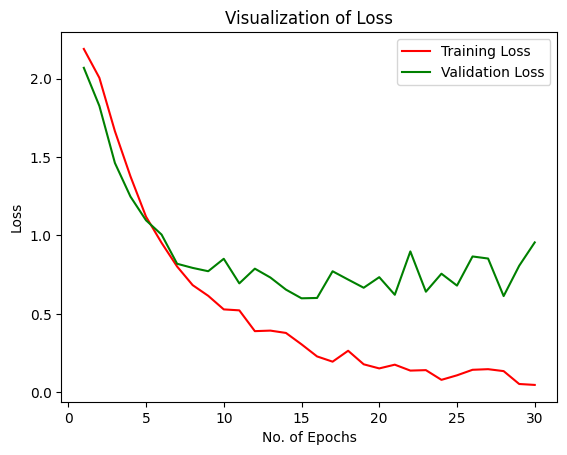

In [84]:
# Visualization of Loss
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history['val_loss'],label="Validation Loss",color='green')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()

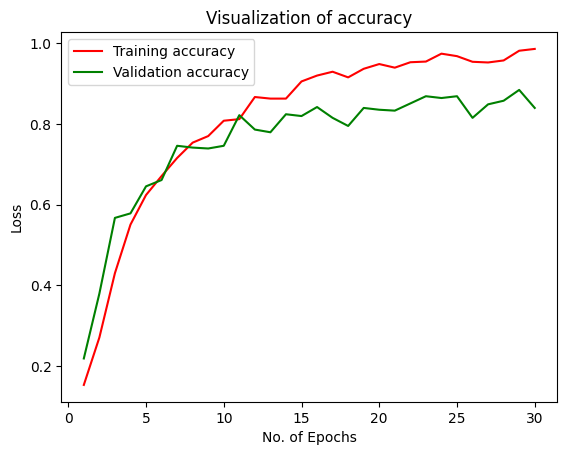

In [85]:
# Visualization of Accuracy
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history['accuracy'],label="Training accuracy",color='red')
plt.plot(epochs,training_history['val_accuracy'],label="Validation accuracy",color='green')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of accuracy")
plt.legend()

# Precison ,Recall, Confusion Matrix - Model evaluation II

In [87]:
X_test.shape

(448, 210, 210, 1)

In [88]:
y_pred=model.predict(X_test)
y_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step


array([[6.1959637e-21, 1.6222198e-35, 7.2040431e-23, ..., 9.4146122e-07,
        3.2158740e-19, 3.4083207e-12],
       [2.4735414e-07, 8.3061463e-01, 2.7986598e-06, ..., 4.4886288e-04,
        1.2191789e-06, 3.1320778e-07],
       [1.4404980e-08, 1.4165556e-06, 5.0516405e-07, ..., 2.4255056e-05,
        1.4799589e-06, 1.0559387e-09],
       ...,
       [3.8231678e-07, 7.6085612e-08, 6.3103825e-01, ..., 2.1611309e-02,
        2.2362233e-03, 3.3619827e-01],
       [2.0249303e-16, 6.2326746e-33, 2.1482904e-09, ..., 4.8184175e-21,
        1.6408747e-34, 4.1877426e-25],
       [6.4263016e-04, 3.9994773e-03, 2.9224621e-02, ..., 5.3414696e-01,
        1.0869029e-01, 1.9961546e-01]], dtype=float32)

In [89]:
y_pred.shape

(448, 10)

In [90]:
predicted_categories=np.argmax(y_pred,axis=1)
predicted_categories

array([4, 1, 5, 4, 4, 0, 0, 6, 6, 1, 8, 7, 6, 4, 8, 5, 5, 1, 5, 2, 6, 9,
       2, 0, 9, 6, 8, 6, 8, 7, 8, 5, 3, 4, 8, 5, 4, 6, 9, 2, 3, 2, 0, 0,
       1, 3, 1, 2, 5, 7, 3, 8, 0, 9, 6, 4, 5, 1, 9, 8, 7, 8, 0, 1, 3, 9,
       4, 7, 0, 9, 7, 7, 5, 6, 4, 7, 0, 0, 3, 8, 9, 7, 1, 8, 6, 1, 8, 4,
       5, 0, 1, 4, 3, 7, 3, 2, 4, 6, 8, 7, 5, 2, 2, 2, 8, 5, 0, 9, 1, 8,
       1, 2, 2, 7, 2, 3, 3, 6, 1, 9, 4, 5, 0, 2, 4, 4, 2, 1, 4, 5, 2, 7,
       4, 1, 9, 4, 0, 4, 6, 0, 0, 2, 2, 3, 9, 0, 4, 8, 1, 6, 6, 1, 9, 1,
       2, 6, 2, 1, 2, 4, 9, 8, 5, 1, 0, 5, 5, 7, 6, 3, 0, 6, 5, 5, 7, 9,
       0, 2, 7, 7, 8, 2, 5, 7, 8, 4, 8, 8, 3, 9, 1, 3, 6, 5, 7, 5, 0, 0,
       9, 9, 4, 1, 4, 3, 0, 4, 1, 8, 8, 0, 8, 7, 7, 0, 4, 6, 2, 9, 8, 1,
       0, 0, 1, 5, 5, 9, 2, 4, 8, 3, 3, 6, 0, 6, 5, 8, 9, 4, 4, 5, 7, 8,
       2, 4, 1, 1, 8, 5, 7, 1, 4, 6, 9, 3, 5, 5, 9, 2, 6, 1, 9, 7, 9, 4,
       7, 3, 2, 4, 5, 0, 3, 0, 2, 5, 7, 9, 1, 2, 6, 8, 1, 2, 9, 8, 2, 8,
       8, 0, 9, 6, 6, 2, 7, 9, 2, 2, 5, 1, 1, 2, 9,

In [93]:
Y_test.shape

(448, 10)

In [92]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [94]:
true_categories= np.argmax(Y_test,axis=1)
true_categories

array([7, 1, 5, 3, 7, 0, 0, 6, 6, 1, 8, 7, 6, 3, 8, 5, 5, 1, 1, 2, 6, 0,
       2, 0, 9, 6, 8, 6, 2, 7, 8, 5, 3, 4, 8, 1, 5, 6, 7, 2, 3, 2, 0, 4,
       1, 3, 1, 2, 5, 7, 3, 8, 0, 7, 6, 4, 5, 1, 9, 8, 7, 8, 2, 1, 3, 9,
       0, 7, 0, 9, 7, 7, 5, 6, 4, 5, 0, 0, 3, 8, 2, 7, 1, 8, 6, 1, 8, 4,
       5, 0, 1, 3, 3, 7, 3, 2, 4, 6, 8, 7, 1, 2, 2, 2, 8, 5, 0, 9, 1, 8,
       1, 3, 2, 5, 2, 3, 3, 6, 1, 9, 4, 2, 0, 2, 4, 4, 2, 1, 4, 5, 7, 7,
       4, 1, 2, 4, 8, 4, 6, 0, 0, 2, 2, 3, 9, 0, 4, 8, 1, 6, 6, 1, 9, 1,
       2, 6, 2, 1, 2, 4, 9, 8, 5, 1, 0, 5, 5, 9, 6, 3, 0, 6, 5, 5, 5, 9,
       0, 2, 7, 7, 8, 2, 1, 7, 8, 4, 7, 8, 6, 2, 1, 3, 6, 1, 2, 5, 0, 0,
       9, 9, 4, 1, 3, 3, 0, 4, 1, 7, 5, 3, 8, 7, 5, 0, 4, 6, 2, 5, 8, 1,
       0, 0, 1, 5, 1, 3, 2, 4, 8, 3, 3, 6, 2, 6, 0, 8, 9, 4, 4, 5, 7, 8,
       2, 4, 1, 1, 8, 5, 7, 1, 4, 6, 9, 3, 1, 5, 4, 7, 6, 1, 3, 7, 3, 4,
       7, 3, 2, 4, 5, 0, 3, 0, 5, 5, 7, 9, 1, 2, 6, 8, 1, 2, 9, 5, 2, 8,
       8, 0, 9, 6, 6, 2, 7, 9, 2, 2, 2, 1, 1, 8, 9,

In [95]:
from sklearn.metrics import confusion_matrix,classification_report

cm= confusion_matrix(true_categories,predicted_categories)

# Precison recall 
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.89      0.87      0.88        45
   classical       0.96      0.81      0.88        58
     country       0.85      0.80      0.83        51
       disco       0.90      0.70      0.79        37
      hiphop       0.83      0.95      0.88        40
        jazz       0.65      0.77      0.71        44
       metal       1.00      0.98      0.99        47
         pop       0.79      0.74      0.77        42
      reggae       0.89      0.89      0.89        46
        rock       0.67      0.87      0.76        38

    accuracy                           0.84       448
   macro avg       0.84      0.84      0.84       448
weighted avg       0.85      0.84      0.84       448



# Confusion Matrix Visualization

In [96]:
cm

array([[39,  0,  0,  0,  1,  2,  0,  0,  0,  3],
       [ 0, 47,  0,  0,  0, 11,  0,  0,  0,  0],
       [ 2,  1, 41,  0,  0,  2,  0,  1,  1,  3],
       [ 1,  0,  2, 26,  4,  0,  0,  0,  0,  4],
       [ 1,  0,  0,  0, 38,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  1, 34,  0,  4,  2,  2],
       [ 0,  0,  0,  1,  0,  0, 46,  0,  0,  0],
       [ 0,  1,  2,  1,  2,  1,  0, 31,  2,  2],
       [ 1,  0,  1,  0,  0,  1,  0,  1, 41,  1],
       [ 0,  0,  1,  1,  0,  1,  0,  2,  0, 33]])

<function matplotlib.pyplot.show(close=None, block=None)>

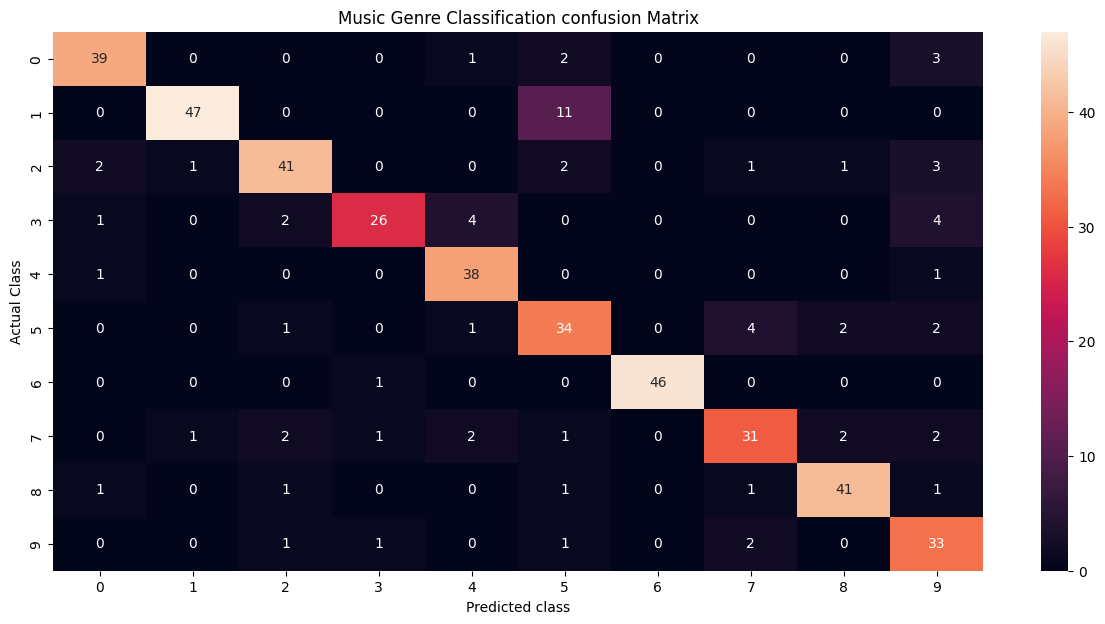

In [109]:
import seaborn as sea

plt.figure(figsize=(15,7))
sea.heatmap(cm,annot=True)
plt.xlabel("Predicted class")
plt.ylabel("Actual Class")
plt.title("Music Genre Classification confusion Matrix")
plt.show